In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

([], <a list of 0 Text yticklabel objects>)

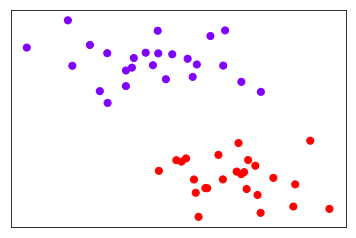

In [38]:
X,y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.6)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.xticks([])
plt.yticks([])

(-0.43660961990940284, 5.772756283035797)

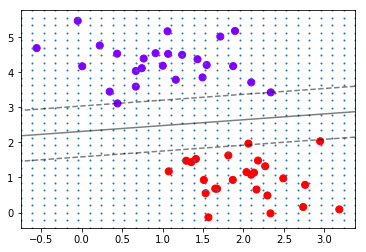

In [40]:
#绘制原数据集散点图 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#获取平面上两条坐标轴的最大值和最小值 
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据，并生成网格 
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
axisx,axisy = np.meshgrid(axisx,axisy)
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
plt.scatter(xy[:,0],xy[:,1],s=1)

#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape) #返回每个输入的样本所对应的到决策边界的距离
#画决策边界和平行于决策边界的超平面 plt.contour和plt.contourf效果相同
ax.contour(axisx,axisy,Z
           ,colors="k"
           ,levels=[-1,0,1]
           ,alpha=0.5
           ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

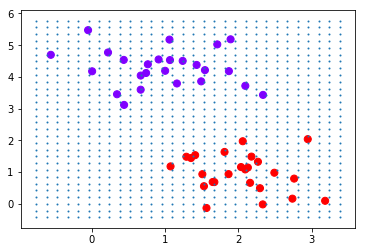

In [4]:
#首先要有散点图 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图

#获取平面上两条坐标轴的最大值和最小值 
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0],xlim[1],30)
axisy = np.linspace(ylim[0],ylim[1],30)
axisx,axisy = np.meshgrid(axisx,axisy) 
#我们将使用这里形成的二维数组作为我们contour函数中的X和Y 
#使用meshgrid函数将两个一维向量转换为特征矩阵 
#核心是将两个特征向量广播，以便获取y.shape * x.shape这么多个坐标点的横坐标和纵坐标
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T 
#其中ravel()是降维函数，vstack能够将多个结构一致的一维数组按行堆叠起来 
#xy就是已经形成的网格，它是遍布在整个画布上的密集的点
plt.scatter(xy[:,0],xy[:,1],s=1)

#理解函数meshgrid和vstack的作用
a = np.array([1,2,3])
b = np.array([7,8])
#两两组合，会得到多少个坐标?
#答案是6个，分别是 (1,7),(2,7),(3,7),(1,8),(2,8),(3,8)
v1,v2 = np.meshgrid(a,b)
v = np.vstack([v1.ravel(), v2.ravel()]).T

(-0.43660961990940284, 5.772756283035797)

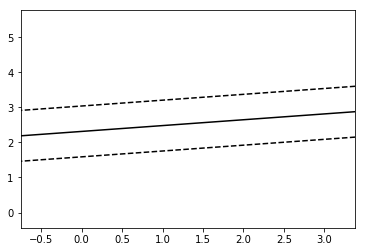

In [5]:
#建模，通过fit计算出对应的决策边界
clf = SVC(kernel = "linear").fit(X,y)
Z = clf.decision_function(xy).reshape(axisx.shape) 

#重要接口decision_function，返回每个输入的样本所对应的到决策边界的距离 
#然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求Z的结构必须与X和Y保持一致
#画决策边界和平行于决策边界的超平面 
ax = plt.gca() #获取当前子图 
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-1,0,1] #画三条等高线，分别是Z为-1，Z为0和Z为1的三条线 ,alpha=0.5
            ,linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

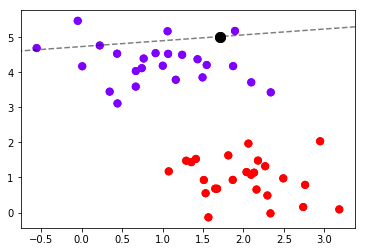

In [6]:
#以第10号样本为例 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
plt.scatter(X[10,0],X[10,1],c="black",s=100)
#计算第10号样本到决策边界的距离 
clf.decision_function(X[10].reshape(1,2)) #-3.33917354
#绘制决策边界 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
plt.scatter(X[10,0],X[10,1],c="black",s=100)
ax = plt.gca()
ax.contour(axisx,axisy,Z
            ,colors="k"
            ,levels=[-3.33917354]
            ,alpha=0.5
            ,linestyles=["--"])

In [7]:
#定义SVC可视化函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],
               alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

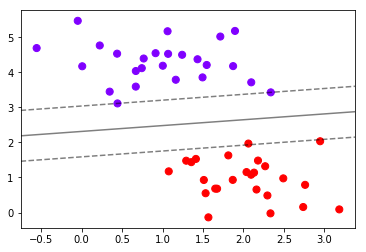

In [8]:
#SVC绘图
clf = SVC(kernel = "linear").fit(X,y) 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow") 
plot_svc_decision_function(clf)

In [9]:
clf.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [10]:
clf.score(X, y)

1.0

In [11]:
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [12]:
clf.n_support_

array([2, 1], dtype=int32)

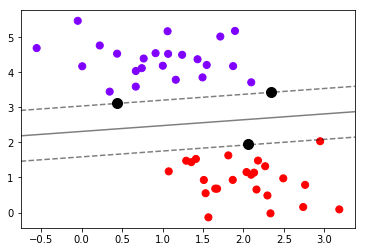

In [9]:
#训练模型
clf = SVC(kernel = "linear").fit(X,y)
#得到支持向量 
sv = clf.support_vectors_
#绘制原数据集的散点图 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
#绘制支持向量可视化图形 
plt.scatter(sv[:,0], sv[:,1], c='black', s=100)
#绘制决策边界
plot_svc_decision_function(clf)

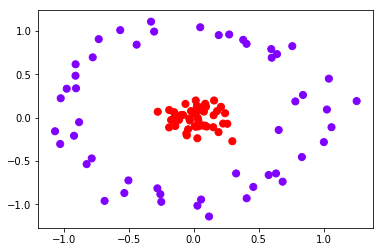

In [10]:
from sklearn.datasets import make_circles
#创建环形数据
X,y = make_circles(100, factor=0.1, noise=.1, random_state=10) 
#绘制可视化图形 
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")

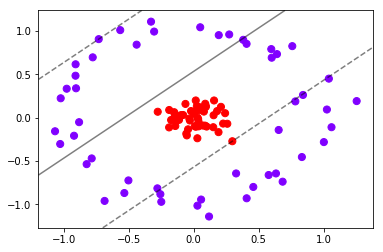

In [11]:
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

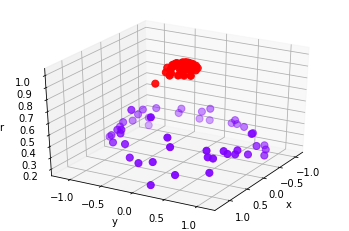

In [12]:
from mpl_toolkits import mplot3d #导入3D绘图包 

#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
#定义一个绘制三维图像的函数 
#elev表示上下旋转的角度 
#azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
#测试函数运行结果 
plot_3D()

In [13]:
from mpl_toolkits import mplot3d
r = np.exp(-(X**2).sum(1))

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")
    plt.show()
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30],azip=(-180,180),X=fixed(X),y=fixed(y))

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30), value=30), IntSlider(value=30, de…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.08825930e-01,  6.16026372e-01],
       [-3.28368201e-01,  1.10752711e+00],
       [ 6.84380266e-01, -7.37821078e-01],
       [ 1.18063801e-01, -1.13933353e+00],
       [ 2.09752579e-01,  1.25214485e-01],
       [ 8.41040535e-01,  2.62162828e-01],
       [-5.28355219e-02, -2.04041813e-01],
       [ 3.26275189e-01, -6.42711801e-01],
       [ 2.87018772e-02, -1.01423614e+00],
       [-2.04464482e-02,  7.66019784e-02],
       [ 7.82111022e-01,  1.87917301e-01],
       [ 1.25402722e+00,  1.91692529e-01],
       [ 1.80063083e-01,  7.63411533e-02],
       [ 1.56627906e-01,  1.98563269e-01],
       [ 7.07042310e-02, -9.03866077e-02],
       [-2.76856290e-01,  6.85851066e-02],
       [ 2.58598497e-01, -6.98553940e-02],
       [-1.06706372e+00, -1.56347311e-01],
       [-8.13901309e-02,  3.11348238e-02],
       [ 8.32489396e-01, -4.53610398e-01],
       [ 1.02797335e-02,  7.18395310e-02],
       [-1.88590212e-01,  8.88058051e-02],
       

/anaconda3/envs/ys/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


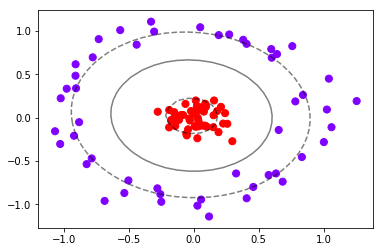

In [14]:
clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [15]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons,make_blobs,make_classification

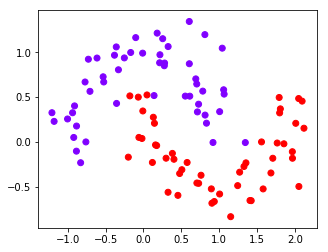

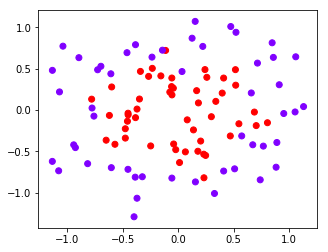

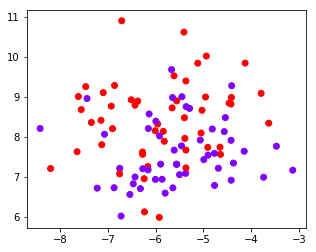

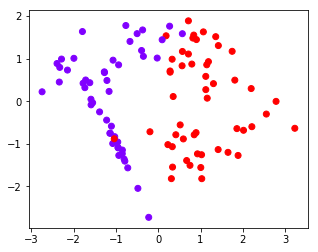

In [16]:
#创建数据集 
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.2, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_blobs(n_samples=n_samples, centers=2, random_state=5),
    make_classification(n_samples=n_samples,n_features =2,
                        n_informative=2,n_redundant=0, random_state=5)
    ]
#四个数据集分别是什么样子呢? 
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow")

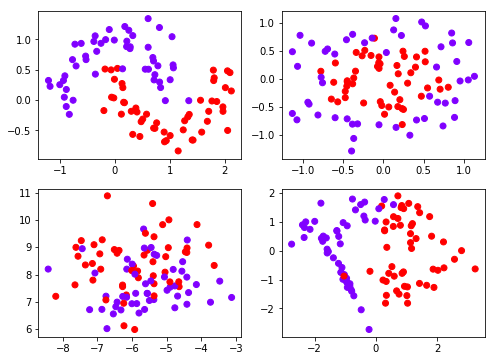

In [17]:
#如果想要把四个数据集放在一张画布上 
plt.figure(figsize=(8,6))
for i,(X,Y) in enumerate(datasets):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap="rainbow")

/anaconda3/envs/ys/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


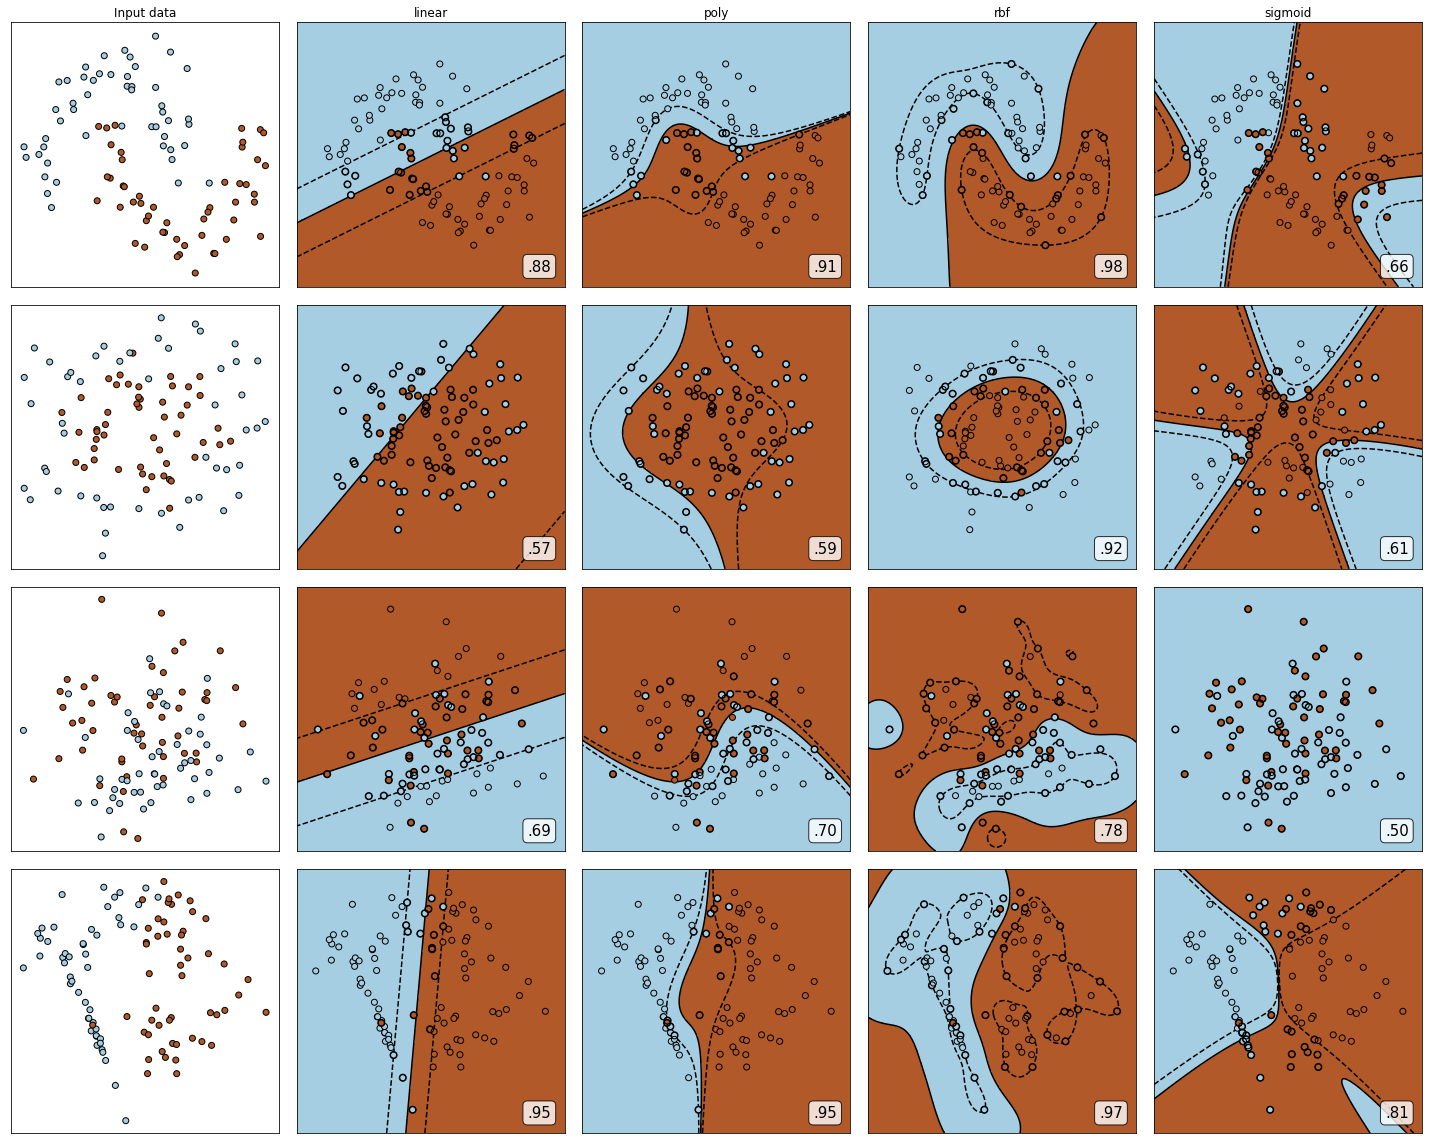

In [18]:
#定义核种类
Kernel = ["linear","poly","rbf","sigmoid"]
#构建子图
nrows=len(datasets)
ncols=len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols,figsize=(20,16))
#第一层循环:在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):
#在图像中的第一列，放置原数据的分布 
    ax = axes[ds_cnt, 0]
    if ds_cnt == 0:
        ax.set_title("Input data")
    ax.scatter(X[:, 0], X[:, 1], c=Y, zorder=10,
               cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks([])
    ax.set_yticks([])
#第二层循环:在不同的核函数中循环 
#从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1]
        #建模
        clf = SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y)
        ax.scatter(X[:, 0], X[:, 1], c=Y, 
                   zorder=10,cmap=plt.cm.Paired,edgecolors='k')
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                   s=50,facecolors='none', zorder=10, edgecolors='k')
        #绘制决策边界
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        #np.mgrid，合并了我们之前使用的np.linspace和np.meshgrid的用法 
        #一次性使用最大值和最小值来生成网格
        #表示为[起始值:结束值:步长] 
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内 
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(),
                                        YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                   linestyles=['--', '-', '--'], levels=[-1, 0, 1])
        #设定坐标轴为不显示 
        ax.set_xticks([]) 
        ax.set_yticks([])
        #将标题放在第一行的顶上 
        if ds_cnt == 0:
            ax.set_title(kernel)
        #为每张图添加分类的分数
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0'), size=15, #字体的大小 
                bbox=dict(boxstyle='round', alpha=0.8, facecolor='white'), #为分数添加一个白色的格子作为底色 
                transform=ax.transAxes, #确定文字所对应的坐标轴，就是ax子图的坐标轴本身 
                horizontalalignment='right' #位于坐标轴的什么方向 
               )
    plt.tight_layout()

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from time import time
import datetime

In [ ]:
#实例化数据集，提取特征和标签 
data = load_breast_cancer() 
X = data.data
y = data.target
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %
(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:297320


In [20]:
#实例化数据集，提取特征和标签 
data = load_breast_cancer() 
X = data.data
y = data.target
#切分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel, gamma="auto").fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %
(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:323568
The accuracy under kernel rbf is 0.596491
00:00:012015
The accuracy under kernel sigmoid is 0.596491
00:00:006130


In [21]:
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel, gamma="auto", degree = 1).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %
(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.929825
00:00:326952
The accuracy under kernel poly is 0.923977
00:00:037189
The accuracy under kernel rbf is 0.596491
00:00:011734
The accuracy under kernel sigmoid is 0.596491
00:00:006443


In [22]:
data = pd.DataFrame(X)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [23]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,569.0,-3.153111e-15,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
1,569.0,-6.568462e-15,1.00088,-2.229249,-0.725963,-0.104636,0.584176,4.651889
2,569.0,-6.993039e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
3,569.0,-8.553985e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
4,569.0,6.081447e-15,1.00088,-3.112085,-0.710963,-0.034891,0.636199,4.770911
5,569.0,-1.136369e-15,1.00088,-1.610136,-0.747086,-0.221940,0.493857,4.568425
6,569.0,-2.997017e-16,1.00088,-1.114873,-0.743748,-0.342240,0.526062,4.243589
7,569.0,1.023981e-15,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
8,569.0,-1.860648e-15,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751
9,569.0,-1.504752e-15,1.00088,-1.819865,-0.722639,-0.178279,0.470983,4.910919


In [24]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ["linear","poly","rbf","sigmoid"]
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel
             , gamma="auto"
             , degree = 1
            ).fit(Xtrain,Ytrain)
    print("The accuracy under kernel %s is %f" %
(kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

The accuracy under kernel linear is 0.976608
00:00:003459
The accuracy under kernel poly is 0.964912
00:00:003415
The accuracy under kernel rbf is 0.970760
00:00:006868
The accuracy under kernel sigmoid is 0.953216
00:00:005275


0.9766081871345029 1.2340816326530613


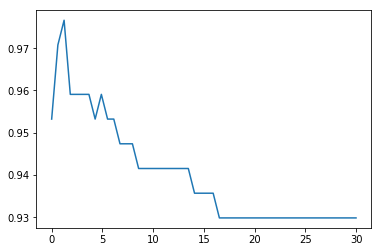

In [25]:
#调线性核函数
score = []
C_range = np.linspace(0.01,30,50) 
for i in C_range:
    clf = SVC(kernel="linear",C=i).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)

0.9824561403508771 7.966530612244898


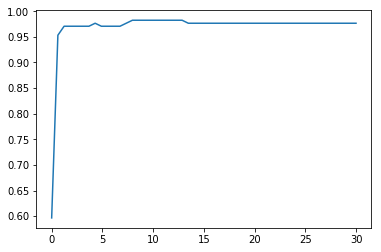

In [26]:
#换rbf
score = []
C_range = np.linspace(0.01,30,50) 
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.01).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)

0.9824561403508771 6.26530612244898


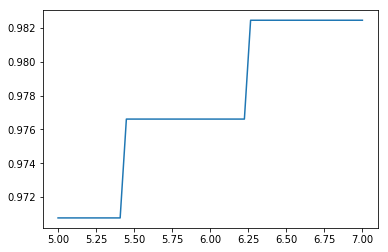

In [28]:
#进一步细化
score = []
C_range = np.linspace(5,7,50) 
for i in C_range:
    clf = SVC(kernel="rbf",C=i,gamma = 0.012).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)

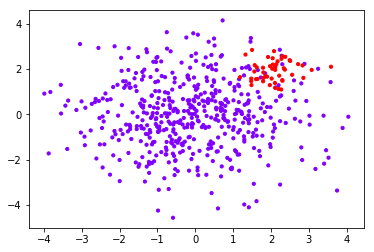

In [29]:
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散 
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)
#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10); #其中红色点是少数类，紫色点是多数类

In [30]:
#不设定class_weight
clf = SVC(kernel='linear', C=1.0) 
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
#设定class_weight
wclf = SVC(kernel='linear', class_weight={1: 10}) 
wclf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
#给两个模型分别打分看看，这个分数是accuracy准确度 
clf.score(X,y)

0.9418181818181818

In [35]:
wclf.score(X,y)

0.9127272727272727